In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
gradeof software,19,17,16,17,16
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [6]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [7]:
X = df.drop("target", axis = 1)
y = df["target"]

In [8]:
X.shape

(100, 3)

In [9]:
y.shape

(100,)

In [10]:
X.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132


____

## SVM - StandardScaler

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state=42)
X_sc_train.shape, y_train.shape, X_sc_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

## SVM Classifier - StandardScaler with GridSearchCV

In [15]:
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 'gamma': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]} 

clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
                
clf_grid.fit(X_sc_train, y_train)

print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 1.4, 'gamma': 1.4}
Best Estimators:
 SVC(C=1.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    0.4s finished
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
model = svm.SVC(kernel='rbf', C = 1.4, gamma=1.4)
model.fit(X_sc_train, y_train)

SVC(C=1.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = model.predict(X_sc_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[3 3 0 0 0]
 [0 1 0 0 0]
 [0 1 7 1 0]
 [0 0 1 5 1]
 [0 0 0 0 2]]
0.72


# Method2 

In [22]:
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis = 1)
y = df["target"]

sc = StandardScaler()
sc.fit(X)

X_scaled = sc.transform(X)
print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_scaled, columns=X.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   education  gender        EQ
0        1.0     1.0  1.855077
1        1.0     1.0  0.463974
2        1.0     1.0  0.054826
3        1.0     1.0  0.791292
4        1.0     1.0  0.545803


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sarak\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm_model.fit(X_train, y_train)
sv_train_score=svm_model.score(X_train, y_train)
sv_test_score=svm_model.score(X_test, y_test)
print('The accuracy of the svm classifier on training data is {:.2f} '.format(sv_train_score))
print('The accuracy of the svm classifier on test data is {:.2f}'.format(sv_test_score))

The accuracy of the svm classifier on training data is 0.78 
The accuracy of the svm classifier on test data is 0.55


In [25]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2 3 0 0 0]
 [0 1 0 0 0]
 [0 0 6 2 0]
 [0 0 2 2 0]
 [0 0 0 2 0]]
0.55


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.25      1.00      0.40         1
           3       0.75      0.75      0.75         8
           4       0.33      0.50      0.40         4
           5       0.00      0.00      0.00         2

   micro avg       0.55      0.55      0.55        20
   macro avg       0.47      0.53      0.42        20
weighted avg       0.63      0.55      0.54        20



C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


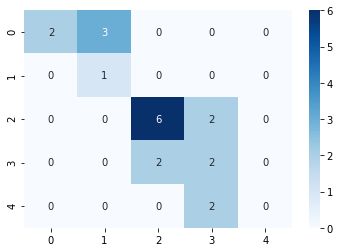

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d", cmap="Blues")